# AI4All Fragile Families Final Project: Predicting GPA at Age 15

## GPA (taken from the[ Fragile Families Challenge Blog](http://www.fragilefamilieschallenge.org/gpa/))
GPA measures academic achievement.

We want to know:

- What helps disadvantaged children to beat the odds and succeed academically?
- What derails children so that they perform unexpectedly poorly?

This is the question that the 15 year olds were asked:
![Survey GPA Question](http://www.fragilefamilieschallenge.org/wp-content/uploads/2017/03/GPA_questionnaire-768x234.png)

### How was the data cleaned?
The measure of GPA is self-reported by the child at approximately age 15. They marked as NA the GPAs of children who were not interviewed, reported no grade, refused to answer, did not know, or were homeschooled, for any of the four subjects. For children with valid answers, we averaged the responses for all four subjects, then subtracted this number from 5 to produce an estimate of child GPA ranging from 1 to 4. In the re-coded variable, a GPA of 4.0 indicates that the child reported straight As, while a GPA of 1.0 indicates that the child reported getting all grades of D or lower.

### Motivation
Helping kids “beat the odds” academically is a fundamental goal of education research; academic success can be the key to breaking the cycle of poverty. Free public education is often referred to as a great equalizer, yet children who grow up in disadvantaged families consistently underperform their more affluent peers on average.

However, the average is not the whole story. Some kids do well despite being expected to do poorly. In fact, the amount of unexplained variation in educational achievement is enormous: **social science models typically have R-squared values of 0.2 or less.** The poor predictive performance of social science models of educational attainment has long been known. In the now-classic 1972 book Inequality: A Reassessment of the Effect of Family and Schooling in America, Harvard social scientist Christopher Jencks argued that random chance played a larger role than measured family background characteristics in determining socioeconomic outcomes.

While social scientists have learned some about what helps children succeed academically in the decades since 1972, a huge proportion of the variance remains buried in the error term of regression models. Is this term truly random chance, or is there “dark matter” out there in the form of unmeasured but important variables that help some kids to beat the odds?

# Why your model matters! 
By submitting a model for GPA at age 15, you help the Fragile Family researchers in their quest to find this dark matter. As you heard from professors Matt Salganik and Sara McLanahan, they have used the models from the Challenge to identify a subset of children performing much better and worse than expected. They are currently interviewing these children to answer the question: what unmeasured variables are common to the kids who are beating the odds, which we do not observe among the children who are struggling unexpectedly?

When you participate, you help them to better understand what affects the academic success of kids your age. **YOU more than your intructors or the Fragile Family professors are better-positioned to uncover unmeasured but important factors. It does not matter how well your model does. What matters is the insight you provide when thinking about you think affects kids your age.** Your models and the interviews will help researchers learn how some kids beat the odds. These results may drive future deductive research to evaluate the causal effect of these unmeasured variables, and ultimately we hope that policymakers can intervene on the “dark matter” we find in order to improve the lives of other disadvantaged children in the future.

# The Data

The Fragile Families Challenge is based on the Fragile Families and Child Wellbeing Study, which has followed thousands of American families for more than 15 years.  During this time, the Fragile Families study collected information about the children, their parents, their schools, and their larger environments.

These data have been used in hundreds of scientific papers and dozens of dissertations, and insight from these studies are routinely shared with policy makers around the world through the Future of Children, which is jointly published by Princeton University and Brookings Institution. Your challenge is to use this data in a new way. 

**Given all the background data from birth to year 9 and some training data from year 15, how well can you predict the GPA outcome in the year 15 test data?**

![Fragile Families Challenge Data](http://www.fragilefamilieschallenge.org/wp-content/uploads/2017/02/ff_design_matrix_challenge.png)

# Let's start! :)

Remember the main steps in building and testing a machine learning model:

1) [Load the Python libraries](#1.-Load-the-Libraries)

2) [Load the data](#2.-Load-the-Data)

3) [Do data imputation (data cleaning) by removing and or changing the missing values in the data](#3.-Data-Imputation)

4) [Explore and Visualize the data through bar plots, histograms, and scatter plots](#4.-Data-Exploration-and-Visualization)

5) [Create new interesting predictors by combining different features (feature engineering)](#5.-Feature-Engineering)

6) [Define your predictors and your outcome and split the data into training and testing sets](#6.-Train-Test-Split)

7) [Build and train your model using the training data](#7.-Model-Building-and-Training)

8) [Test the performance of the model using the testing data and an appropriate performance metric](#8.-Model-Testing)

9) [Go back to step 5 and improve your model!](#9.-Improving-the-model)

10) [Interpret the model results by examining the model coefficients and the performance metric](#10.-Interpreting-the-Results)

11) [Final test!](#11.-Testing-our-model-with-the-test.csv-data)

# 1. Load the Libraries

In [1]:
# First, we load the libraries we will need for this notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.stats as stats # this library provides functions for performing statistics on data
import pandas as pd
import numpy as np
import sys
import sklearn # this library provides functions for performing machine learning on data
import ff_functions as fff # this is the library we are providing for you to perform common operations on data

# The following line mutes a Pandas warning that we don't need to worry about at the moment
pd.options.mode.chained_assignment = None  # default='warn'

# 2. Load the Data

In [2]:
# We read in the Fragile Families data as in previous notebooks

# First, we tell Python the location of the folder with the background.cvs data file
background = "../ff_data/background.csv"
# What does this line do?
data_frame = pd.read_csv(background, low_memory=False)
# We set the index of the DataFrame to match the challengeID
data_frame = data_frame.set_index('challengeID')
data_frame.head()

m1intmon  m1intyr  m1lenhr  m1lenmin  cm1twoc  cm1fint  cm1tdiff  \
challengeID                                                                     
1                  -3      NaN       -3        40      NaN        0       NaN   
2                  -3      NaN        0        40      NaN        1       NaN   
3                  -3      NaN        0        35      NaN        1       NaN   
4                  -3      NaN        0        30      NaN        1       NaN   
5                  -3      NaN        0        25      NaN        1       NaN   

             cm1natsm  m1natwt  cm1natsmx    ...      m4d9     m4e23  \
challengeID                                  ...                       
1                 NaN      NaN        NaN    ...      -3.0 -3.000000   
2                 NaN      NaN        NaN    ...      -3.0  8.473318   
3                 NaN      NaN        NaN    ...      -3.0 -3.000000   
4                 NaN      NaN        NaN    ...      -3.0 -3.000000   
5                 NaN      NaN        NaN    ...      -3.0 -3.000000   

                  f4d6       f4d7  f4d9       m5c6     m5d20  m5k10  \
challengeID                                                           
1            -3.000000  -3.000000  -3.0  -3.000000 -3.000000     -3   
2            -3.000000  -3.000000  -3.0  -3.000000  9.845074     -3   
3             9.097495  10.071504  -3.0  -3.000000 -3.000000     -3   
4             9.512706  10.286578  -3.0  10.677285 -3.000000     -3   
5            11.076016   9.615958  -3.0   9.731979 -3.000000     -3   

                  f5c6       k5f1  
challengeID                        
1            -3.000000  -3.000000  
2            -3.000000   9.723551  
3            -3.000000  -3.000000  
4             8.522331  10.608137  
5            10.115313   9.646466  

[5 rows x 12942 columns]

In [4]:
# Let's read in the GPA training data for year 15. This is in a different file called train.csv

# First, we tell Python the location of the folder with the train.cvs data file
train = "../ff_data/train.csv"
# What does this line do?
data_frame_outcomes = pd.read_csv(train, low_memory=False)
# We set the index of the DataFrame to match the challengeID
data_frame_outcomes = data_frame_outcomes.set_index('challengeID')
data_frame_outcomes.head()

gpa  grit  materialHardship  eviction  layoff  jobTraining
challengeID                                                            
1            NaN   NaN               NaN       NaN     NaN          NaN
3            NaN   NaN               NaN       NaN     NaN          NaN
6            NaN  3.50          0.090909       0.0     0.0          0.0
7            2.5  3.25          0.000000       0.0     0.0          0.0
8            NaN   NaN               NaN       NaN     NaN          NaN

# 3. Data Imputation

In [5]:
# Let's print a summary of the GPA data
data_frame_outcomes['gpa'].describe()

count    1165.000000
mean        2.866738
std         0.665322
min         1.000000
25%         2.500000
50%         3.000000
75%         3.250000
max         4.000000
Name: gpa, dtype: float64

In [6]:
# How many rows do we have?
nrows = data_frame_outcomes.shape[0]
print("We have ",nrows," rows.")
# How many missing values do we have in the data?
nmissing = data_frame_outcomes['gpa'].isnull().sum()
print("We have ",nmissing," rows are NaN.")
print("We have ",nrows-nmissing," rows are not NaN.")
percentMissing = (nmissing/nrows)*100;
print(str(percentMissing)+'% of the rows are NaN.')

We have  2121  rows.
We have  956  rows are NaN.
We have  1165  rows are not NaN.
45.0730787364% of the rows are NaN.


In [7]:
# Imputation method 1: remove rows with NaN
gpa = fff.pick_ff_variables(data_frame_outcomes,['gpa'],remove_nans=True)
gpa.head()

Data frame with  1165  rows and  1 columns.


gpa
challengeID      
7            2.50
9            2.25
10           3.25
13           2.75
14           3.25

In [8]:
# Imputation method 2: replace NaN with minimum value of 1 
# Why would we do this?

#gpa = pd.DataFrame(data_frame_outcomes['gpa'].fillna(1))
#gpa.head()

In [9]:
# Imputation method 3: replace NaN with average gpa value 
# Why would we do this?

#avg_gpa = data_frame_outcomes['gpa'].mean()
#gpa = pd.DataFrame(data_frame_outcomes['gpa'].fillna(avg_gpa))
#gpa.head()

# 4. Data Exploration and Visualization

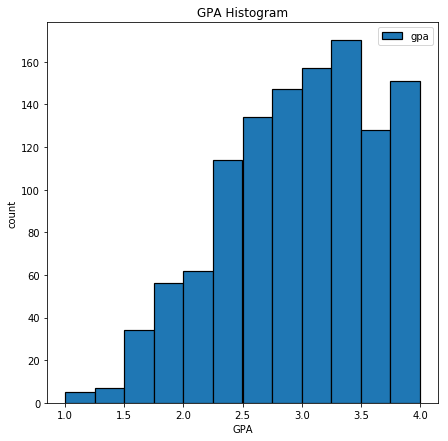

In [10]:
# Plot a histogram of GPA
fff.plot_histogram(gpa['gpa'],labels=['gpa'],xlabel='GPA',ylabel='count',title='GPA Histogram')

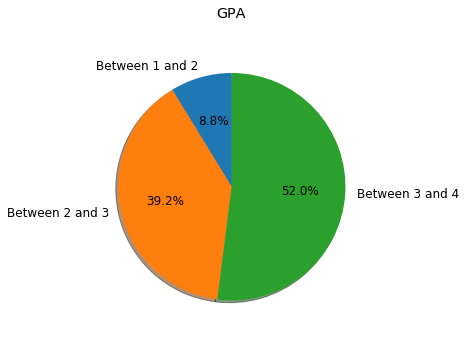

In [11]:
gpa1_2 = gpa[gpa['gpa']<2].shape[0]
gpa2_3 = gpa[(gpa['gpa']>=2)&(gpa['gpa']<3)].shape[0]
gpa3_4 = gpa[gpa['gpa']>=3].shape[0]

fff.one_pie_chart([gpa1_2,gpa2_3,gpa3_4],label='GPA',pie_labels=['Between 1 and 2','Between 2 and 3','Between 3 and 4'])

# 5. Feature Engineering

We will provide you with a few features that will help you get started. These features are:

1) Mother's race (cm1ethrace)

2) Mother's level of education (cm1edu)

3) Mother's marriage status (cm1relf)

4) Teacher's evaluation of student's skills in Year 9 (engineered feature: average of t5c13a, t5c13b, and t5c13c)

In [12]:
df = fff.pick_ff_variables(data_frame,['cm1ethrace','cm1edu','cm1relf','t5c13a','t5c13b','t5c13c'],remove_nans=True,remove_negatives=True)
# we also simplify the answers in cm1relf to consider only three cases: married, cohabitating, and other
df.loc[df['cm1relf']>=3,'cm1relf']=3

df.head()

Data frame with  1977  rows and  6 columns.


cm1ethrace  cm1edu  cm1relf  t5c13a  t5c13b  t5c13c
challengeID                                                     
2                     4       1        3       3       3       2
9                     3       2        1       1       2       2
11                    2       4        3       4       4       4
12                    1       3        1       4       4       4
14                    2       3        1       3       4       4

Here we create a new feature to predict GPA based on the teacher's evaluation of the student's skills in Year 9. We will average the following 3 features:

1) Teacher's evaluation of child's Language and Literacy Skills ('t5c13a')

2) Teacher's evaluation of child's Science and Social Studies skills ('t5c13b')

3) Teacher's evaluation of child's Math skills ('t5c13c')

In [13]:
df['skills'] = df[['t5c13a','t5c13b','t5c13c']].sum(axis=1)/3
df.head()

cm1ethrace  cm1edu  cm1relf  t5c13a  t5c13b  t5c13c    skills
challengeID                                                               
2                     4       1        3       3       3       2  2.666667
9                     3       2        1       1       2       2  1.666667
11                    2       4        3       4       4       4  4.000000
12                    1       3        1       4       4       4  4.000000
14                    2       3        1       3       4       4  3.666667

## One-Hot Encoding of Categorical Variables

Remember that to use categorical variables in linear regression, we need to do one-hot encoding which creates a number of binary columns, each per each category.

In [14]:
# One-hot encoding of race
race = pd.get_dummies(df['cm1ethrace'])
race.columns = ['White','Black','Hispanic','Other Race']
race.head()

White  Black  Hispanic  Other Race
challengeID                                    
2                0      0         0           1
9                0      0         1           0
11               0      1         0           0
12               1      0         0           0
14               0      1         0           0

In [15]:
# One-hot encoding of level of education
education = pd.get_dummies(df['cm1edu'])
education.columns = ['Less than HS','HS','Some College/Tech','College/Grad']
education.head()

Less than HS  HS  Some College/Tech  College/Grad
challengeID                                                   
2                       1   0                  0             0
9                       0   1                  0             0
11                      0   0                  0             1
12                      0   0                  1             0
14                      0   0                  1             0

In [16]:
# One-hot encoding of relationship to father
relationship = pd.get_dummies(df['cm1relf'])
relationship.columns = ['Married','Cohabitating','Other Rel']
relationship.head()

Married  Cohabitating  Other Rel
challengeID                                  
2                  0             0          1
9                  1             0          0
11                 0             0          1
12                 1             0          0
14                 1             0          0

### Combine all one-hot encoded columns

In [17]:
predictors = pd.concat([df['skills'],race,education,relationship],axis=1)
predictors.head()

skills  White  Black  Hispanic  Other Race  Less than HS  HS  \
challengeID                                                                   
2            2.666667      0      0         0           1             1   0   
9            1.666667      0      0         1           0             0   1   
11           4.000000      0      1         0           0             0   0   
12           4.000000      1      0         0           0             0   0   
14           3.666667      0      1         0           0             0   0   

             Some College/Tech  College/Grad  Married  Cohabitating  Other Rel  
challengeID                                                                     
2                            0             0        0             0          1  
9                            0             0        1             0          0  
11                           0             1        0             0          1  
12                           1             0        1             0          0  
14                           1             0        1             0          0

# 6. Train Test Split

Before we can split the data into training and testing data sets, we need to make sure that the GPA data frame has the same rows as the predictors data frame

In [18]:
data = pd.merge(gpa, predictors, left_index=True, right_index=True)
data.head()

gpa    skills  White  Black  Hispanic  Other Race  Less than HS  \
challengeID                                                                     
9            2.25  1.666667      0      0         1           0             0   
14           3.25  3.666667      0      1         0           0             0   
16           2.00  1.666667      0      1         0           0             0   
18           2.25  2.000000      0      1         0           0             1   
23           2.50  3.000000      1      0         0           0             0   

             HS  Some College/Tech  College/Grad  Married  Cohabitating  \
challengeID                                                               
9             1                  0             0        1             0   
14            0                  1             0        1             0   
16            1                  0             0        0             0   
18            0                  0             0        0             1   
23            0                  1             0        0             1   

             Other Rel  
challengeID             
9                    0  
14                   0  
16                   1  
18                   0  
23                   0

In [19]:
df=pd.DataFrame([1,2,1,2,3,4,5,56,5,6,7])
df.iloc[0:2,:]

0
0  1
1  2

In [20]:
from sklearn.model_selection import train_test_split

# The following lines of code randomly splits both the outcome data and the predictor data into 
# a training and a testing set. The test_size argument is a number between 0 and 1 that tells the 
# function the percentage of data that should go into the test set.

x = data.iloc[:,1:] # predictors are all columns of data except column 0
y = data['gpa'] # outcome is the first column of data

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=100)

print(df.shape)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

# Transform to numpy arrays
train_x = fff.pandas_to_2d_numpy(train_x)
train_y = fff.pandas_to_2d_numpy(train_y)

test_x = fff.pandas_to_2d_numpy(test_x)
test_y = fff.pandas_to_2d_numpy(test_y)

(11, 1)
(512, 12)
(220, 12)
(512,)
(220,)


# 7. Model Building and Training

In [21]:
# import the linear_model function from sklearn
from sklearn import linear_model

# intialize the model
reg = linear_model.LinearRegression()

# fit the model ON THE TRAINING DATA (important!)
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# Print the trained model coefficients

# c0 is eual to the model intercept
print("c0 = ",reg.intercept_)

# the other coefficients tells us how the features affect the outcome
i=1
for c in reg.coef_[0]:
    print('c'+str(i)+'=',c)
    i+=1

c0 =  [ 2.52956348]
c1= 0.166437912793
c2= -0.019187606578
c3= -0.0975063116587
c4= -0.0343536265074
c5= 0.151047544744
c6= -0.224961359615
c7= -0.108728527414
c8= 0.0428615651195
c9= 0.29082832191
c10= 0.0195999710396
c11= -0.00554062405689
c12= -0.0140593469827


# 8. Model Testing

In [23]:
# How well can the model predict the testing data?
pred_y = reg.predict(test_x)
# Now, we can quantify how good our model is at predicting new values by computing R2 score
R2 = sklearn.metrics.r2_score(test_y, pred_y)
print('mean root of square error : {}'.format(R2))

mean root of square error : 0.15770807229056738


In [24]:
# How well can the model predict the training data? (sanity check)
pred_y = reg.predict(train_x)
# Now, we can quantify how good our model is at predicting new values by computing R2 score
R2 = sklearn.metrics.r2_score(train_y, pred_y)
print('mean root of square error : {}'.format(R2))

mean root of square error : 0.16918610211089458


In [25]:
data_frame.shape

(4242, 12942)

In [26]:
np.mean(data_frame.isnull().sum())/4242

0.17512499643897764

# 9. Improving the model

- Are there any more interesting features in the data that you think might affect GPA?
- Are there any features that you can create with the data that you think might be a good predictor for GPA?
- Have you tried a different imputation method?
    - Removing missing values
    - Replacing missing values with the average of the column
    - Replacing missing values with the median of the column
    - Replacing missing values with another statistic that makes sense

# 10. Interpreting the Results

# 11. Testing our model with the test.csv data

In [51]:
# Let's read in the GPA test data for year 15. This is in a different file called test.csv
# First, we tell Python the location of the folder with the train.cvs data file
testfile = "../ff_data/test.csv"
data_test = pd.read_csv(testfile)
data_test = data_test.set_index('challengeID')

# pick gpa from data_test
gpa_test = fff.pick_ff_variables(data_test,['gpa'],remove_nans=True,remove_negatives=True)
print(gpa_test.shape)
gpa_test.head()

Data frame with  886  rows and  1 columns.
(886, 1)


gpa
challengeID      
4            3.00
11           3.25
15           2.75
17           3.25
29           1.75

In [52]:
# combine test gpa and predictors data
dataT = pd.merge(gpa_test, predictors, left_index=True, right_index=True)
dataT.head()

gpa    skills  White  Black  Hispanic  Other Race  Less than HS  \
challengeID                                                                     
11           3.25  4.000000      0      1         0           0             0   
15           2.75  2.000000      0      0         1           0             0   
17           3.25  3.000000      0      1         0           0             0   
48           3.00  2.666667      0      0         1           0             1   
51           3.75  4.000000      0      1         0           0             0   

             HS  Some College/Tech  College/Grad  Married  Cohabitating  \
challengeID                                                               
11            0                  0             1        0             0   
15            1                  0             0        1             0   
17            1                  0             0        0             1   
48            0                  0             0        0             1   
51            0                  1             0        1             0   

             Other Rel  
challengeID             
11                   1  
15                   0  
17                   0  
48                   0  
51                   0

In [53]:
# Get predictors data for rows in test
x = dataT.iloc[:,1:] # predictors are all columns of data except column 0
y = dataT['gpa'] # outcome is the first column of data
print(x.shape)
print(y.shape)

(563, 12)
(563,)


In [54]:
# Predict test data using our multiple linear regression model
pred_y = reg.predict(x)
# Now, we can quantify how good our model is at predicting new values by computing R2 score
R2 = sklearn.metrics.r2_score(y, pred_y)
print('R2 score: {}'.format(R2))

R2 score: 0.15654277018311347
